In [111]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


In [112]:
def load_images_from_folder(folder_path1,folder_path2):
    
    images = []
    shape = (224, 224)
    
    for filename in os.listdir(folder_path1):
        img = cv2.imread(os.path.join(folder_path1, filename))
        img = cv2.resize(img, shape)
        
        if img is not None:
            images.append(img)
    
    for filename in os.listdir(folder_path2):
        img = cv2.imread(os.path.join(folder_path2, filename))
        img = cv2.resize(img, shape)
        
        if img is not None:
            images.append(img) 
    return np.array(images)

In [113]:
def show_image(image):
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

In [114]:
images=load_images_from_folder('images/NoTumor/','images/Tumor/')
images=images.astype('float32') / 255

In [115]:
print(type(images))

<class 'numpy.ndarray'>


In [116]:
print(images.shape)

(1201, 224, 224, 3)


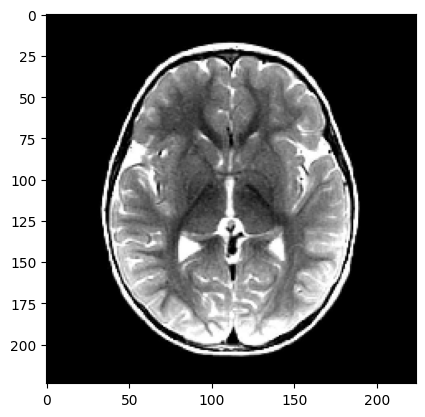

In [117]:
show_image(images[0])

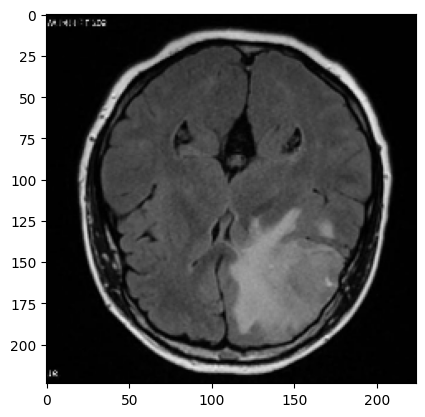

In [118]:
show_image(images[1199])

In [119]:
def output(folderpath1,folderpath2):
    outputs=[]
    for filename in os.listdir(folderpath1):
        img = cv2.imread(os.path.join(folderpath1, filename))
        if img is not None:
            outputs.append(0)
    for filename in os.listdir(folderpath2):
        img = cv2.imread(os.path.join(folderpath2, filename))
        if img is not None:
            outputs.append(1)
    return np.array(outputs)

In [120]:
outputs=output('images/NoTumor/','images/Tumor/')

In [121]:
print(outputs)

[0 0 0 ... 1 1 1]


In [122]:
print(outputs.shape)

(1201,)


In [123]:
print(outputs.shape)
print(outputs[0])
print(outputs[1199])

(1201,)
0
1


In [124]:
X_train, X_test, y_train, y_test = train_test_split(images, outputs, test_size=0.3, random_state=1, stratify=outputs)

In [125]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(840, 224, 224, 3)
(840,)
(361, 224, 224, 3)
(361,)


In [148]:
#build model
model =  Sequential()

#feature extraction
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters = 64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu'))    
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.25))
        
# Classification 
model.add(Flatten())

model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=1, activation= 'sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 26, 26, 32)      

In [150]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [151]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
27/27 [==============================] - 120s 4s/step - loss: 0.5683 - accuracy: 0.7119 - val_loss: 0.4224 - val_accuracy: 0.8089
Epoch 2/15
27/27 [==============================] - 115s 4s/step - loss: 0.4374 - accuracy: 0.7810 - val_loss: 0.3534 - val_accuracy: 0.8698
Epoch 3/15
27/27 [==============================] - 110s 4s/step - loss: 0.3244 - accuracy: 0.8464 - val_loss: 0.2368 - val_accuracy: 0.9058
Epoch 4/15
27/27 [==============================] - 112s 4s/step - loss: 0.3319 - accuracy: 0.8619 - val_loss: 0.2966 - val_accuracy: 0.8698
Epoch 5/15
27/27 [==============================] - 114s 4s/step - loss: 0.2490 - accuracy: 0.8988 - val_loss: 0.2760 - val_accuracy: 0.9114
Epoch 6/15
27/27 [==============================] - 116s 4s/step - loss: 0.2077 - accuracy: 0.9250 - val_loss: 0.2956 - val_accuracy: 0.8920
Epoch 7/15
27/27 [==============================] - 118s 4s/step - loss: 0.1501 - accuracy: 0.9345 - val_loss: 0.1759 - val_accuracy: 0.9418
Epoch 8/15
27

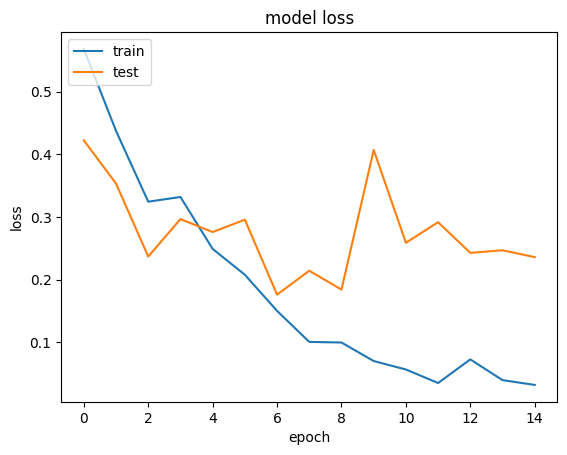

In [152]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

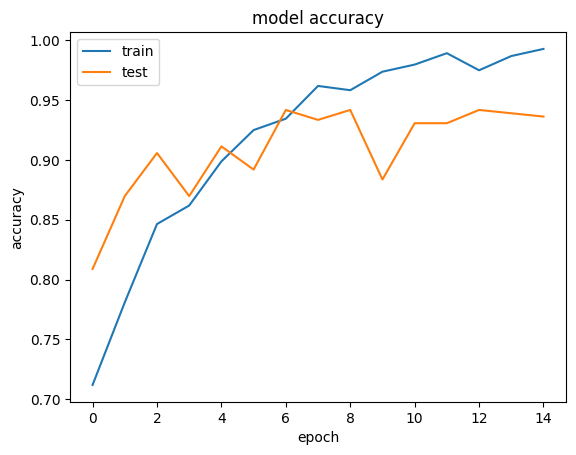

In [153]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [154]:
y_pred = model.predict(X_test)

12/12 [==============================] - 11s 873ms/step


In [155]:
y_pred[:5]

array([[9.9897397e-01],
       [1.1604953e-09],
       [9.9506074e-01],
       [6.4114384e-02],
       [4.3636246e-06]], dtype=float32)

In [156]:
y_predSCALED=[]
for i in y_pred:
    if i>=0.5:
        y_predSCALED.append(1)
    else:
        y_predSCALED.append(0)


In [157]:
y_predSCALED=np.array(y_predSCALED)

In [158]:
y_predSCALED[:5]

array([1, 0, 1, 0, 0])

In [160]:
print(classification_report(y_test, y_predSCALED))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       181
           1       0.92      0.95      0.94       180

    accuracy                           0.94       361
   macro avg       0.94      0.94      0.94       361
weighted avg       0.94      0.94      0.94       361

